<a href="https://colab.research.google.com/github/sznajdr/barcs/blob/main/barcodezz_csv.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from IPython.display import clear_output
!wget -nc https://github.com/matomo-org/travis-scripts/raw/71555936095b4d4252ec0a2eeacd710a17793db4/fonts/Arial.ttf
clear_output(wait=True)
import pandas as pd
import ipywidgets as widgets
import json

df = pd.DataFrame(columns=["barcode", "title"])
barcode_textbox = widgets.Text(description="Barcode:")
title_textbox = widgets.Text(description="Titel:")
table = widgets.Output(layout=widgets.Layout(height='120px'))
table.append_display_data(df)

add_button = widgets.Button(description="Hinzufügen", style={'font-size': '20px', 'height': '50px'})
add_barcode_button = widgets.Button(description="Barcodes erstellen", style={'font-size': '20px', 'height': '50px'})

try:
    with open('products.json') as f:
        products = json.load(f)
except FileNotFoundError:
    products = {"products": []}

def add_row(button):
    global df, products
    barcode = barcode_textbox.value
    title = title_textbox.value
    df = df.append({"barcode": barcode, "title": title}, ignore_index=True)
    products["products"].append({"barcode": barcode, "title": title})
    table.clear_output()
    with table:
        display(df)
    with open('products.json', 'w') as f:
        json.dump(products, f)
    df.to_csv('barcodes.csv', index=False, mode='a', header=not any(df.index))

def add_barcode(button):
    global df
    barcode = barcode_textbox.value
    df = df.append({"barcode": barcode, "title": ""}, ignore_index=True)
    table.clear_output()
    with table:
        display(df)

    # Generate barcode image for the added barcode
    # Set the barcode type to EAN13
    bcid = "ean13"

    # Set the font for the product title
    font = ImageFont.truetype("Arial.ttf", size=14)

    # Set the EAN13 number as the text to encode
    ean = barcode

    # Set the product title as the filename
    filename = "{}.png".format(barcode)

    # Set the API endpoint URL
    url = "https://bwipjs-api.metafloor.com/?bcid={}&text={}".format(bcid, ean)
    print("Barcode URL:", url)

    # Send an HTTP GET request to the API endpoint
    response = requests.get(url)

    # Save the returned PNG image file with the product title as the filename
    with open(filename, "wb") as f:
        f.write(response.content)
    print("Saved barcode image as:", filename)

    # Open the saved barcode image
    filename = filename.strip()
    with Image.open(filename) as img:

        # Get the size of the barcode image
        width, height = img.size
        
        # Set the maximum width for the product title text
        max_title_width = 40

        # Wrap the product title text into multiple lines if it is too long to fit
        wrapped_title = textwrap.wrap(product["title"], width=max_title_width, break_long_words=True)

        # Calculate the total height required for the wrapped product title text
        wrapped_title_height = 0
        for line in wrapped_title:
            wrapped_title_height += font.getsize(line)[1]

        # Calculate the total width required for the title and barcode
        total_width = max(width, font.getsize(product["title"])[0])

        # Create a new image with extra margin to fit the wrapped product title text
        new_width = total_width + 2 # Add extra margin on both sides
        new_height = height + wrapped_title_height + 32 # Add extra margin at bottom
        new_img = Image.new("RGBA", (new_width, new_height), color=(255, 255, 255, 255))

        # Paste the barcode image on the new image
        barcode_x = (new_width - width) // 2
        new_img.paste(img, (barcode_x, 0), img)

        # Create a drawing object for the product title
        draw = ImageDraw.Draw(new_img)

        # Calculate the coordinates to center the wrapped product title text
        x = new_width // 2
        y = height + 10 + (wrapped_title_height // 2)

        # Draw each line of the wrapped product title text
        for line in wrapped_title:
            text_width, text_height = font.getsize(line)
            draw.text((x - text_width // 2, y - text_height // 4), line, font=font, fill=(0, 0, 0, 255))
            y += text_height

        # Save the final image with the wrapped product title text
        final_filename = "/content/" + filename
        new_img.save(final_filename)
        print("Saved final image as:", final_filename)

    df = pd.read_csv("barcodes.csv")
    table.clear_output()
    with table:
        display(df)

add_button.on_click(add_row)
add_barcode_button.on_click(add_barcode)

gui = widgets.VBox([barcode_textbox, title_textbox, add_button, add_barcode_button, table], layout=widgets.Layout(heightd='100px'))
display(gui)


# barcode+titel von barcode.csv
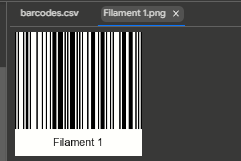    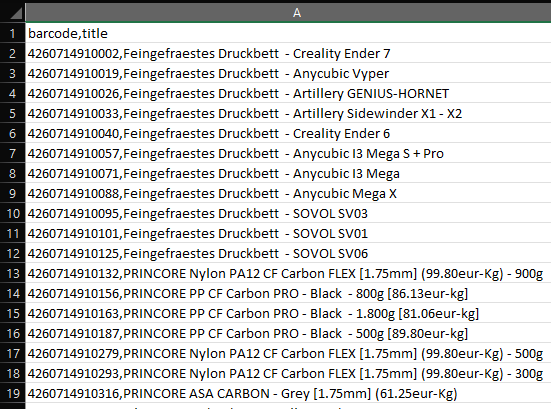

In [ ]:
!wget -nc https://github.com/matomo-org/travis-scripts/raw/71555936095b4d4252ec0a2eeacd710a17793db4/fonts/Arial.ttf
import requests
import json
from PIL import Image, ImageDraw, ImageFont
import csv
import chardet
import textwrap

csv_file = "barcodes.csv"
json_file = "products.json"

products = []

# Determine the character encoding of the CSV file
with open(csv_file, "rb") as f: 
    result = chardet.detect(f.read())
    encoding = result["encoding"]

# Open the CSV file with the detected encoding
with open(csv_file, "r", encoding=encoding) as f:
    reader = csv.DictReader(f)
    for row in reader:
        # Create a new dictionary with the barcode and title
        product = {"barcode": row["barcode"], "title": row["title"]}
        # Add the product to the list of products
        products.append(product)

# Create a dictionary with the products list
data = {"products": products}

# Write the dictionary to a JSON file
with open(json_file, "w") as f:
    json.dump(data, f)

print("Conversion complete!")

# Set the barcode type to EAN13
bcid = "ean13"

# Set the font for the product titles
font = ImageFont.truetype("Arial.ttf", size=14)

# Load the list of products from the JSON file
with open("products.json") as f:
    products = json.load(f)["products"]

# Loop through each product and generate a barcode image
for product in products:
    # Set the EAN13 number as the text to encode
    ean = product["barcode"]
    # Set the product title as the filename
    filename = "{}.png".format(product["title"])

    # Set the API endpoint URL
    url = "https://bwipjs-api.metafloor.com/?bcid={}&text={}".format(bcid, ean)
    print("Barcode URL:", url)

    # Send an HTTP GET request to the API endpoint
    response = requests.get(url)

    # Save the returned PNG image file with the product title as the filename
    with open(filename, "wb") as f:
        f.write(response.content)
    print("Saved barcode image as:", filename)

    # Open the saved barcode image
    with Image.open(filename) as img:

        # Get the size of the barcode image
        width, height = img.size
        
        # Set the maximum width for the product title text
        max_title_width = 40

        # Wrap the product title text into multiple lines if it is too long to fit
        wrapped_title = textwrap.wrap(product["title"], width=max_title_width, break_long_words=True)

        # Calculate the total height required for the wrapped product title text
        wrapped_title_height = 0
        for line in wrapped_title:
            wrapped_title_height += font.getsize(line)[1]

        # Calculate the total width required for the title and barcode
        total_width = max(width, font.getsize(product["title"])[0])

        # Create a new image with extra margin to fit the wrapped product title text
        new_width = total_width + 2 # Add extra margin on both sides
        new_height = height + wrapped_title_height + 32 # Add extra margin at bottom
        new_img = Image.new("RGBA", (new_width, new_height), color=(255, 255, 255, 255))

        # Paste the barcode image on the new image
        barcode_x = (new_width - width) // 2
        new_img.paste(img, (barcode_x, 0), img)

        # Create a drawing object for the product title
        draw = ImageDraw.Draw(new_img)

        # Calculate the coordinates to center the wrapped product title text
        x = new_width // 2
        y = height + 10 + (wrapped_title_height // 2)

        # Draw each line of the wrapped product title text
        for line in wrapped_title:
            text_width, text_height = font.getsize(line)
            draw.text((x - text_width // 2, y - text_height // 4), line, font=font, fill=(0, 0, 0, 255))
            y += text_height

        # Save the final image with the wrapped product title text
        final_filename = "/content/" + filename
        new_img.save(final_filename)
        print("Saved final image as:", final_filename)